In [2]:
%matplotlib inline
import numpy as np
import json
import matplotlib.pyplot as plt
import os
from scipy.stats import beta
import utils

In [3]:
def calculate_MOI(N_infected, Nc):
    if Nc == 0:
        return 0
    x = np.linspace(0,5,200)
    gamma = np.float(Nc)*np.log(1-1/np.float(Nc))
    posterior = np.abs(gamma*np.exp(gamma*x))*beta.pdf(np.exp(gamma*x), 1+Nc-N_infected, 1+N_infected)
    idx = np.argmax(posterior)
    return x[idx]

In [4]:
root_direc = utils.ROOT_DIREC
data_direc = os.path.join(root_direc, 'datatxt')

In [5]:
sky_blue = (86.0/255.0, 180.0/255.0, 233.0/255.0)

In [6]:
data_file = open(os.path.join(data_direc, 'data_by_name.txt'), 'r')
data_dict = json.load(data_file)

In [7]:
MOI_list = []

for gene in data_dict.keys():
	stats_list = data_dict[gene]
	total = stats_list[1]
	infected = stats_list[2]
	MOI_list.append(calculate_MOI(infected, total))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in multiply
//anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1582: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (scale > 0) & (x >= self.a) & (x <= self.b)
//anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1582: RuntimeWarning: invalid value encountered in less_equal
  cond1 = (scale > 0) & (x >= self.a) & (x <= self.b)


[0, 2, 0, 2000]

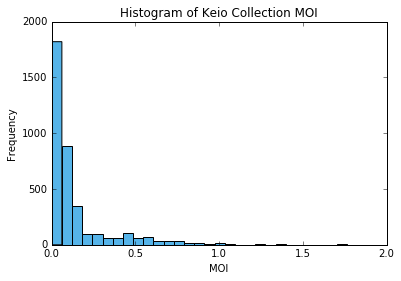

In [8]:
plt.figure()
plt.hist(MOI_list, 50, color=sky_blue)
plt.xlabel('MOI')
plt.ylabel('Frequency')
plt.title('Histogram of Keio Collection MOI')
plt.axis([0, 2, 0, 2000])

In [9]:
p_list = []

for gene in data_dict.keys():
	stats_list = data_dict[gene]
	p_list.append(stats_list[6])

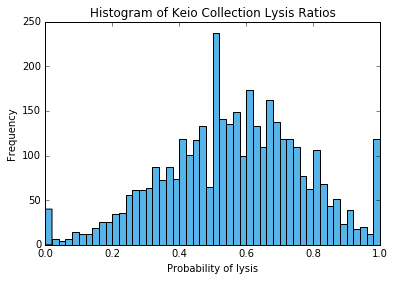

In [10]:
plt.figure()
plt.hist(p_list, 50, color=sky_blue)
plt.xlabel('Probability of lysis')
plt.ylabel('Frequency')
plt.title('Histogram of Keio Collection Lysis Ratios')

In [11]:
data_file.close()